# Predicting Hepatitis C 🩺

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

## Loading up the data

In [ ]:
df = pd.read_csv("/content/HepatitisCdata.csv")
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
df.dtypes

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [ ]:
df.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [ ]:
# Mapping numeric values

df['Category'] = df['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0,
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

df['Sex'] = df['Sex'].map({'m': 1, 'f': 2})

In [ ]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
# Checking the data types again after the transformation
df.dtypes

Category      int64
Age           int64
Sex           int64
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [ ]:
# Checking for missing values in the dataset
df.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [ ]:
# Filling missing values with the median
df.fillna(df.median(), inplace=True)

In [ ]:
df.isna().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

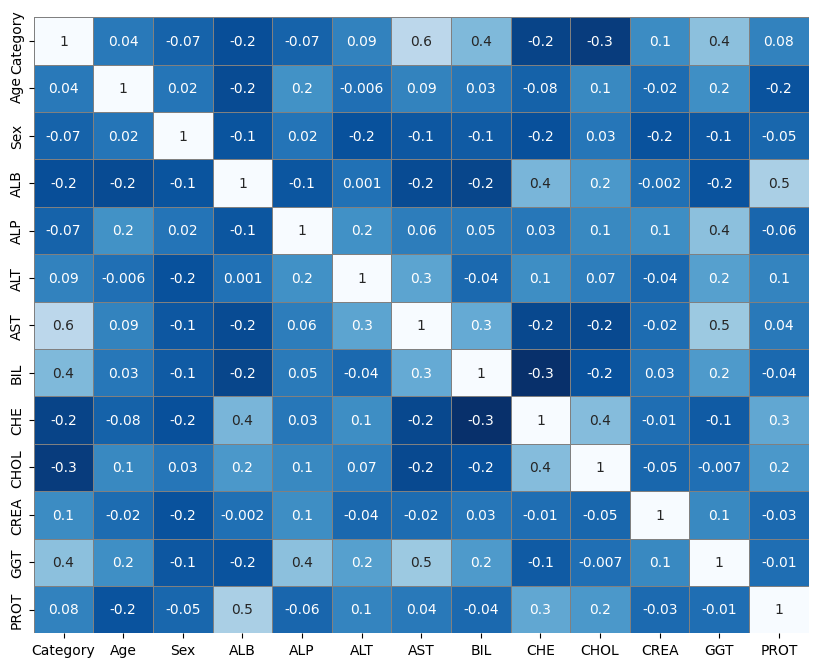

In [ ]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="Blues_r", cbar=False, linewidths=0.5, linecolor='grey');

In [ ]:
print ('Total Suspected Patients : {} '.format(df.Category.value_counts()[0]))
print ('Total Healthy Patients : {} '.format(df.Category.value_counts()[1]))

Total Suspected Patients : 540 
Total Healthy Patients : 75 


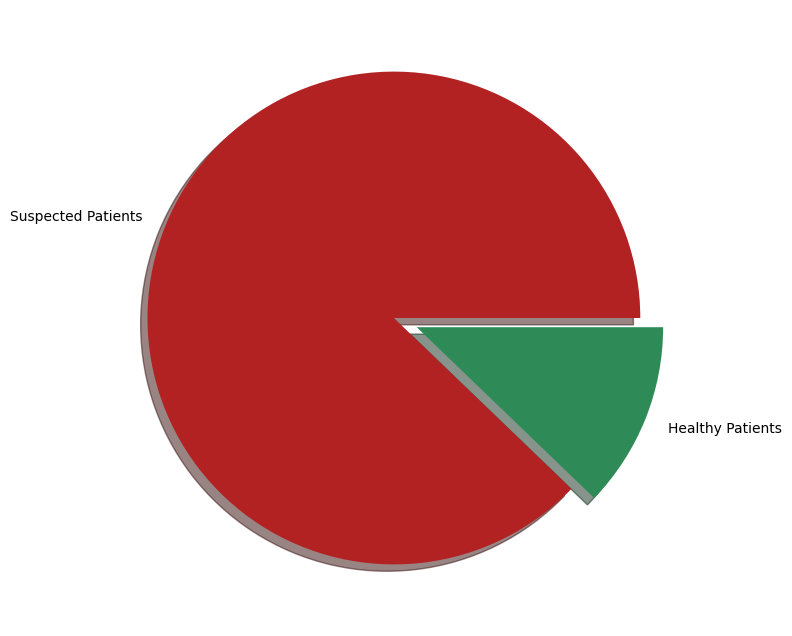

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

plt.pie(x=df["Category"].value_counts(),
        colors=["firebrick","seagreen"],
        labels=["Suspected Patients","Healthy Patients"],
        shadow = True,
        explode = (0, 0.1)
        )

plt.show()

In [ ]:
df.Sex.value_counts()

Sex
1    377
2    238
Name: count, dtype: int64

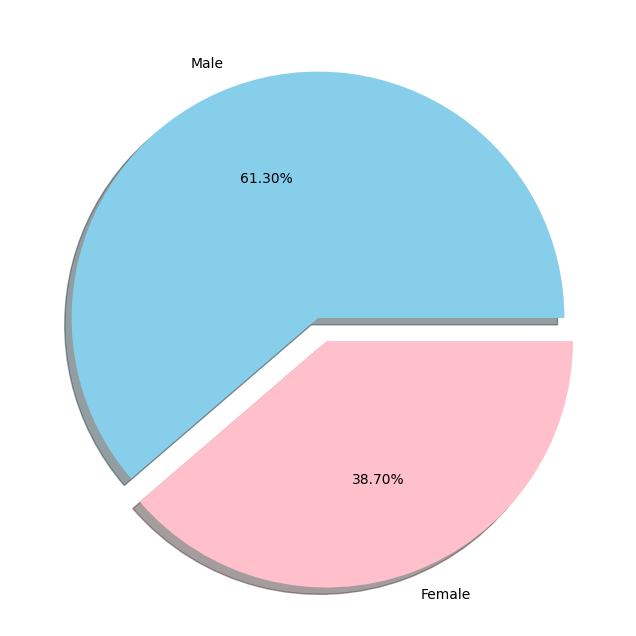

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=df["Sex"].value_counts(),
        colors=["skyblue","pink"],
        labels=["Male","Female"],
        shadow = True,
        autopct="%1.2f%%",
        explode = (0, 0.1)
        )
plt.show()

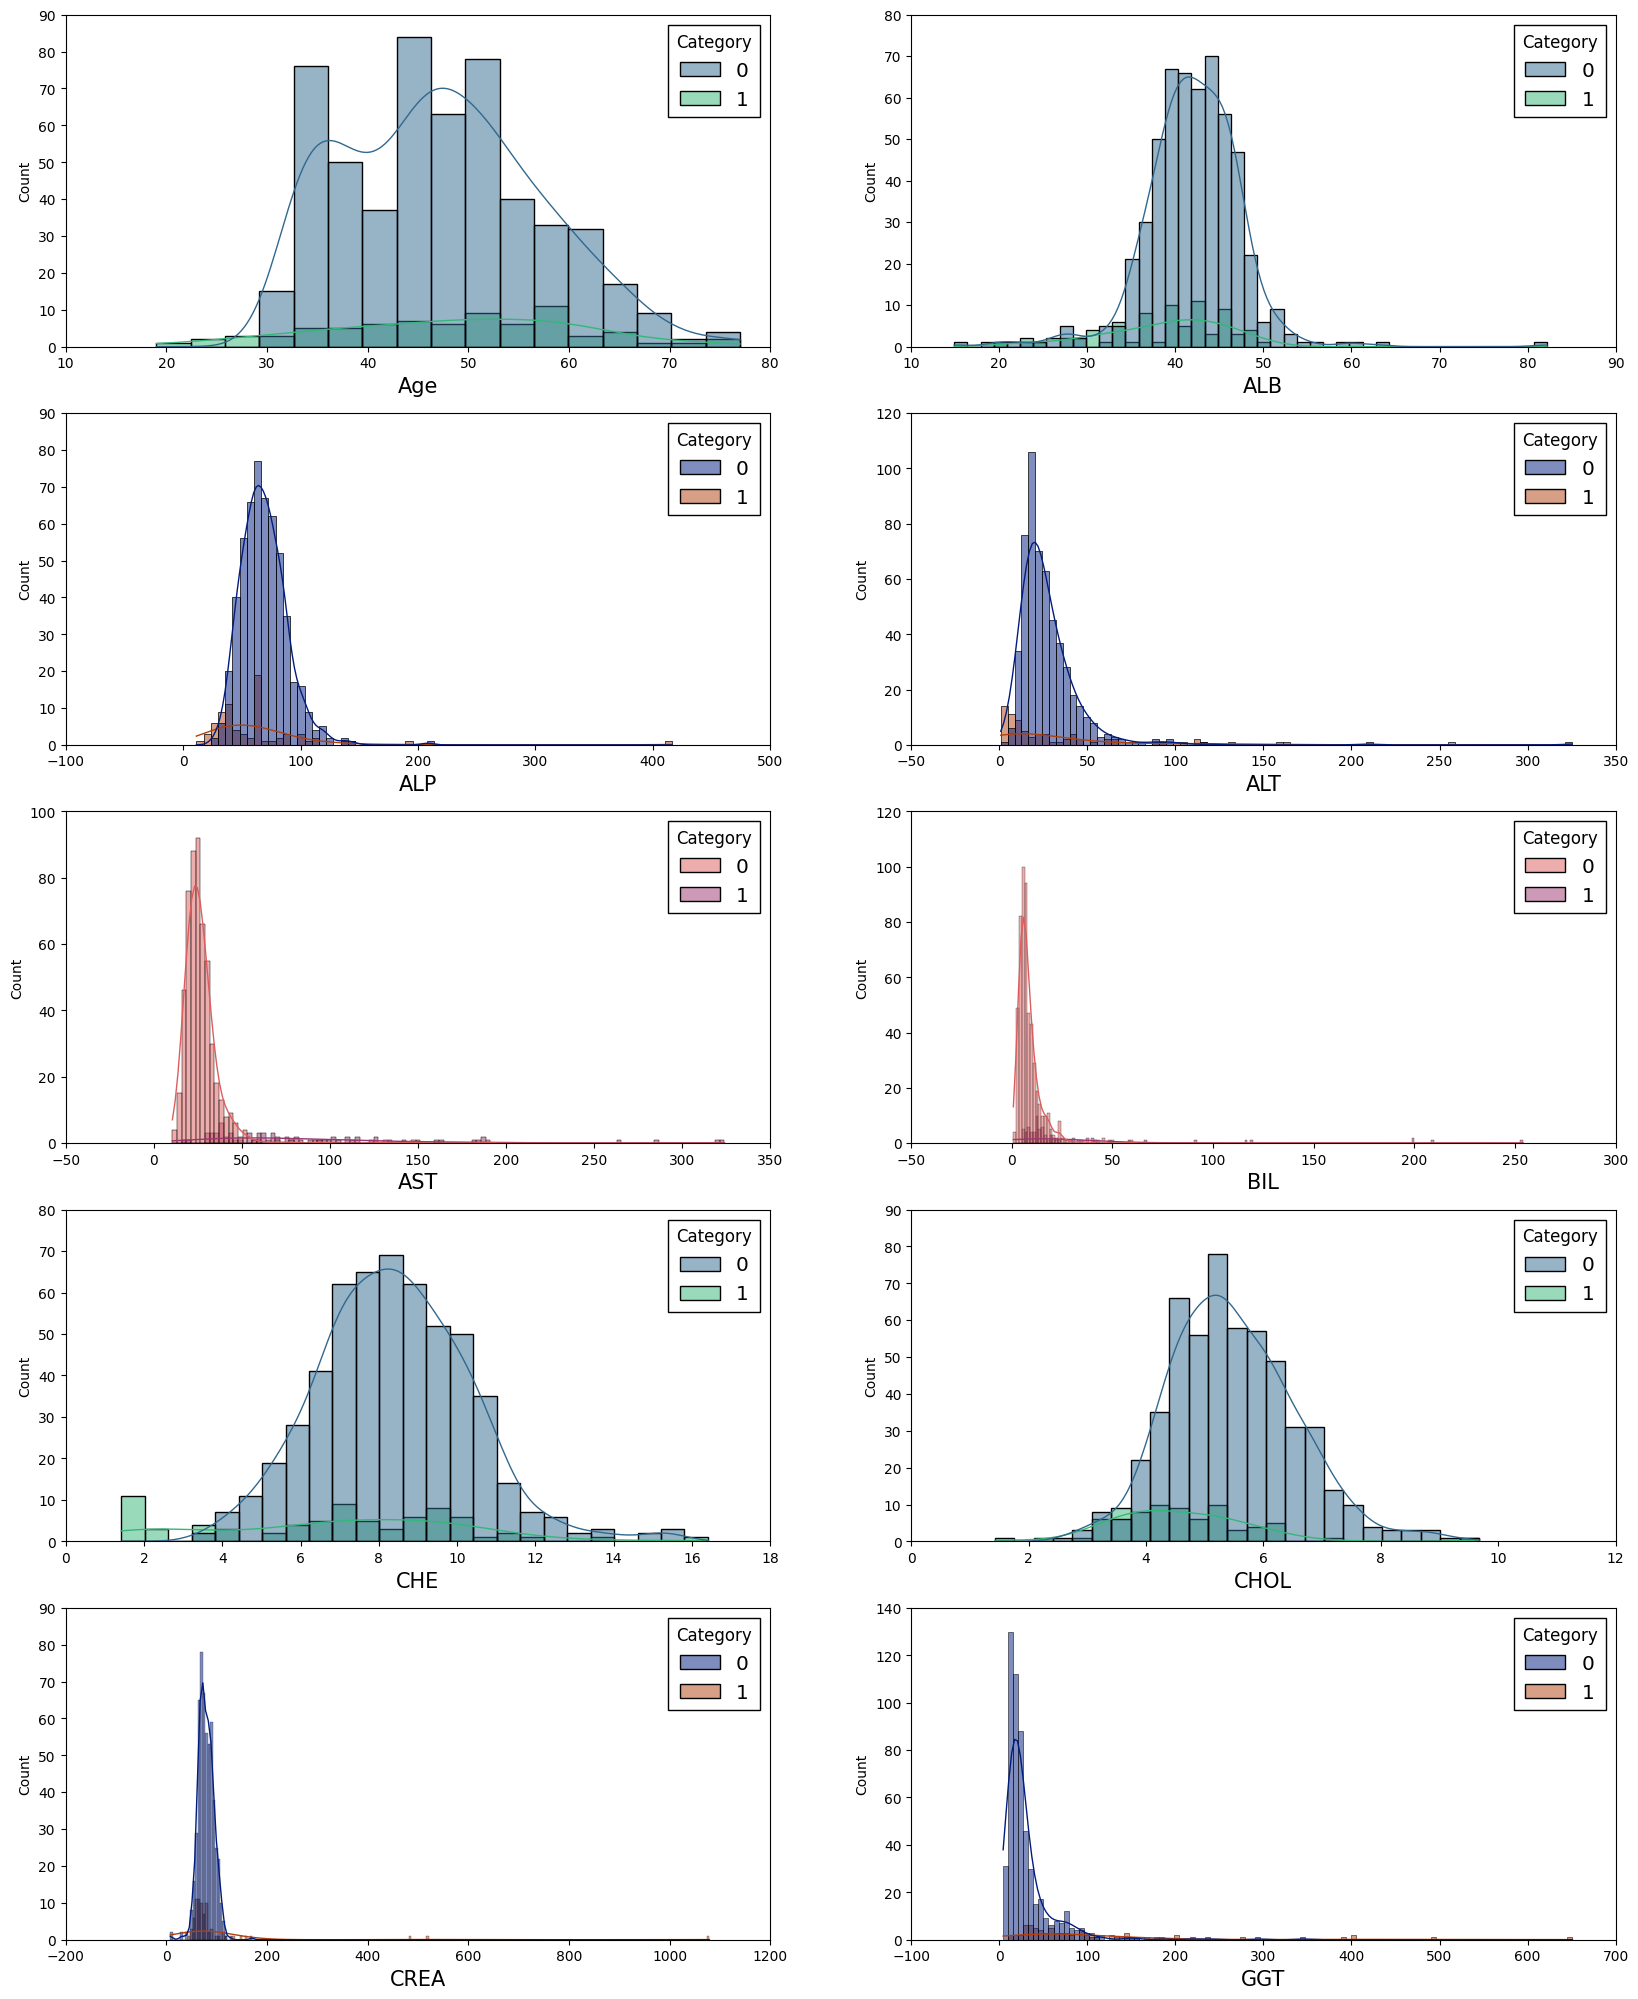

In [ ]:
fig, ax =plt.subplots(5,2, figsize=(20,25))
plt.style.use("classic")


sns.histplot(x = df["Age"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,0]);
ax[0,0].set_xlabel("Age",fontsize=15)

sns.histplot(x = df["ALB"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,1]);
ax[0,1].set_xlabel("ALB",fontsize=15)


sns.histplot(x = df["ALP"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,0]);
ax[1,0].set_xlabel("ALP",fontsize=15)

sns.histplot(x = df["ALT"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,1]);
ax[1,1].set_xlabel("ALT",fontsize=15)


sns.histplot(x = df["AST"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,0]);
ax[2,0].set_xlabel("AST",fontsize=15)

sns.histplot(x = df["BIL"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,1]);
ax[2,1].set_xlabel("BIL",fontsize=15)


sns.histplot(x = df["CHE"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,0]);
ax[3,0].set_xlabel("CHE",fontsize=15)

sns.histplot(x = df["CHOL"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,1]);
ax[3,1].set_xlabel("CHOL",fontsize=15);


sns.histplot(x = df["CREA"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,0]);
ax[4,0].set_xlabel("CREA",fontsize=15)

sns.histplot(x = df["GGT"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,1]);
ax[4,1].set_xlabel("GGT",fontsize=15);

## Splitting the data into training and test datasets
Here, we are trying to predict whether the patient has Hepatitis C or not using the given data. Hence, the `Category` will be the y label and rest of the data will be the X or the input data.

In [ ]:
# X data
X = df.drop("Category", axis=1)
X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
# y data
y = df["Category"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test)

(492, 123)

In [ ]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
LogisticRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression model: 88.6178861788618


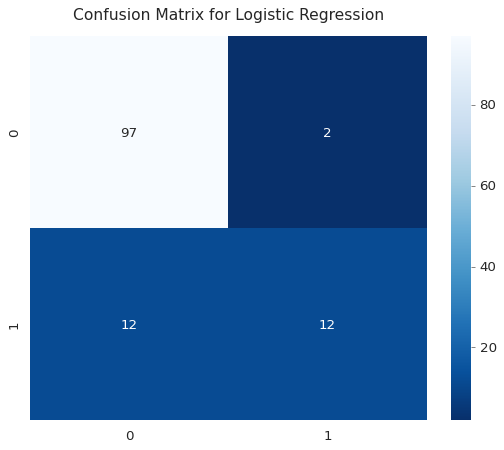

In [ ]:
# Having a look at the confusion matrix for Logistic Regression

from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")
y_pred_lr = lr.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Logistic Regression", fontsize=14, y=1.03);

In [ ]:
# Having a look at the classification report of Logistic Regression

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.86      0.50      0.63        24

    accuracy                           0.89       123
   macro avg       0.87      0.74      0.78       123
weighted avg       0.88      0.89      0.87       123



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
RandomForestClassifierScore = rfc.score(X_test,y_test)
print("Accacy obtained by Random Forest Classifier :", RandomForestClassifierScore*100)

Accacy obtained by Random Forest Classifier : 92.6829268292683


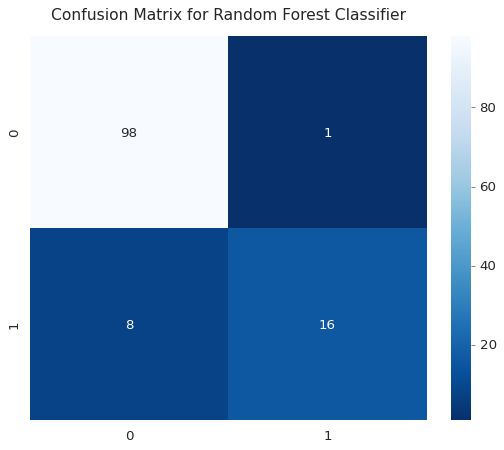

In [ ]:
# Confusion Matrix of Random Forest Classifier
y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, y=1.03);

In [ ]:
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96        99
           1       0.94      0.67      0.78        24

    accuracy                           0.93       123
   macro avg       0.93      0.83      0.87       123
weighted avg       0.93      0.93      0.92       123



## K Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier :", KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier : 85.36585365853658


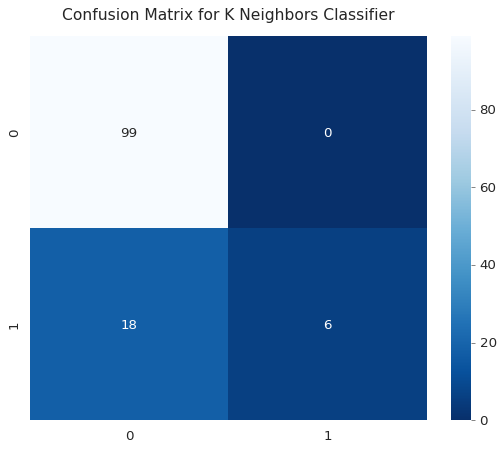

In [ ]:
# Confustion Matrix

y_pred_knn = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=14, y=1.03);

In [ ]:
print(metrics.classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        99
           1       1.00      0.25      0.40        24

    accuracy                           0.85       123
   macro avg       0.92      0.62      0.66       123
weighted avg       0.88      0.85      0.82       123



## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
DecisionTreeClassifierScore = tree.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier :", DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier : 92.6829268292683


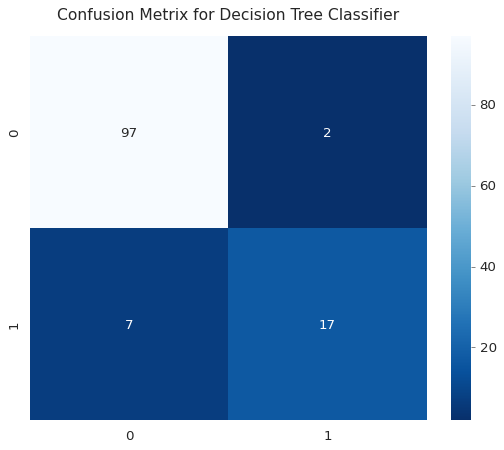

In [ ]:
y_pred_tree = tree.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Metrix for Decision Tree Classifier", fontsize=14,  y=1.03);

In [ ]:
print(metrics.classification_report(y_test, y_pred_tree));

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        99
           1       0.89      0.71      0.79        24

    accuracy                           0.93       123
   macro avg       0.91      0.84      0.87       123
weighted avg       0.93      0.93      0.92       123



## CatBoost Classifier

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train);

Learning rate set to 0.5
0:	learn: 0.4056594	total: 49.9ms	remaining: 449ms
1:	learn: 0.3052358	total: 52.4ms	remaining: 210ms
2:	learn: 0.2281643	total: 54.9ms	remaining: 128ms
3:	learn: 0.1874827	total: 57.7ms	remaining: 86.5ms
4:	learn: 0.1540611	total: 61.4ms	remaining: 61.4ms
5:	learn: 0.1302461	total: 65ms	remaining: 43.3ms
6:	learn: 0.1100836	total: 67.1ms	remaining: 28.8ms
7:	learn: 0.0993443	total: 69.5ms	remaining: 17.4ms
8:	learn: 0.0894244	total: 71.9ms	remaining: 7.98ms
9:	learn: 0.0820818	total: 74.3ms	remaining: 0us


In [ ]:
CatBoostClassifierScore = cat.score(X_test,y_test)
print("Accuracy obtained by CatBoost Classifier model:",CatBoostClassifierScore*100)

Accuracy obtained by CatBoost Classifier model: 91.869918699187


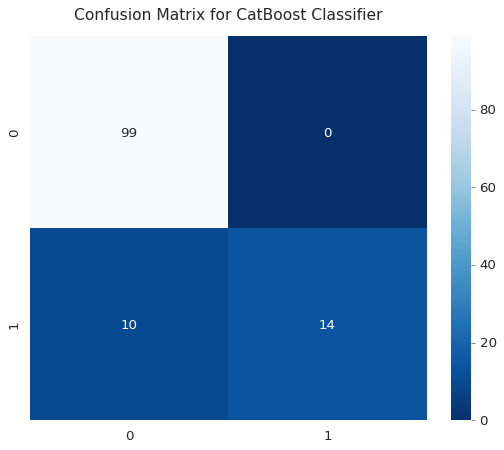

In [ ]:
# Confusion matrix
y_pred_cat = cat.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for CatBoost Classifier", fontsize=14, y=1.03);

In [ ]:
# Classification Report of CatBoost Classifier
print(metrics.classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        99
           1       1.00      0.58      0.74        24

    accuracy                           0.92       123
   macro avg       0.95      0.79      0.84       123
weighted avg       0.93      0.92      0.91       123



## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
GradientBoostingClassifierScore = gb.score(X_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier model: 94.3089430894309


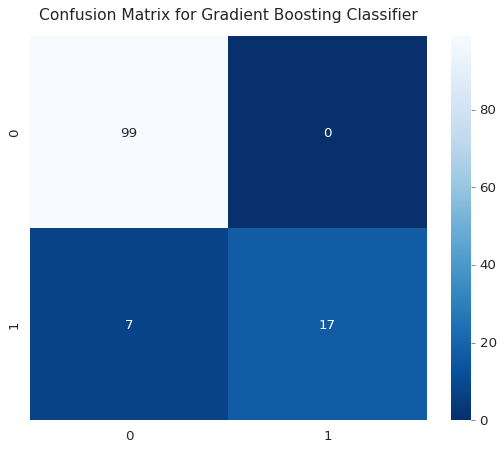

In [ ]:
# Confusion matrix
y_pred_gb = gb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Gradient Boosting Classifier", fontsize=14, y=1.03);

In [ ]:
# Classification Report of Gradient Boosting Classifier
print(metrics.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        99
           1       1.00      0.71      0.83        24

    accuracy                           0.94       123
   macro avg       0.97      0.85      0.90       123
weighted avg       0.95      0.94      0.94       123



## Gausian Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
nb_score = nb.score(X_test, y_test)
print("Accuracy obtained by Gaussian NaiveBayes model:", nb_score*100)

Accuracy obtained by Gaussian NaiveBayes model: 87.8048780487805


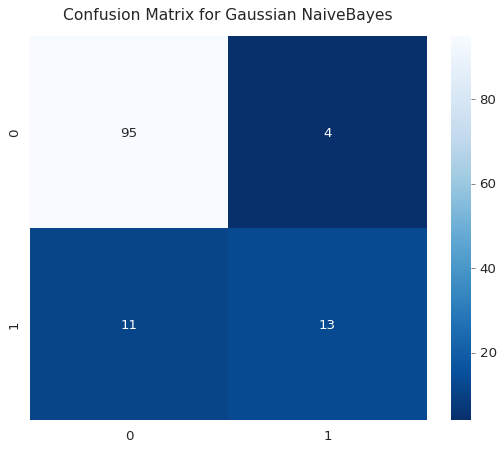

In [ ]:
# Confusion matrix for Naive Bayes
y_pred_nb = nb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Gaussian NaiveBayes", fontsize=14, y=1.03);

In [ ]:
# Classification Report for Naive Bayes
print(metrics.classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.76      0.54      0.63        24

    accuracy                           0.88       123
   macro avg       0.83      0.75      0.78       123
weighted avg       0.87      0.88      0.87       123



## SupportVectorMachine Classifier

In [ ]:
from sklearn.svm import SVC
SupportVectorClassifier = SVC()
SupportVectorClassifier.fit(X_train, y_train)

SVC()

In [ ]:
SVMScore = SupportVectorClassifier.score(X_test, y_test)
print("Accuracy obtained by Support Vector Machine (SVM) Classifier:", SVMScore * 100)

Accuracy obtained by Support Vector Machine (SVM) Classifier: 91.05691056910568


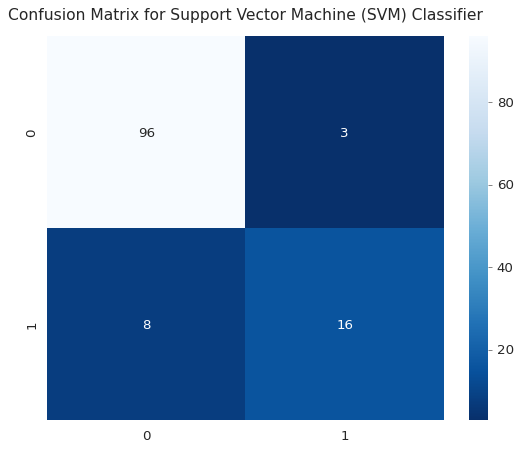

In [ ]:
# Confusion matrix for SVM Classifier
y_pred_svm = SupportVectorClassifier.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Support Vector Machine (SVM) Classifier", fontsize=14, y=1.03)
plt.show()

In [ ]:
# Classification Report for SVM Classifier
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        99
           1       0.84      0.67      0.74        24

    accuracy                           0.91       123
   macro avg       0.88      0.82      0.84       123
weighted avg       0.91      0.91      0.91       123



## MultiLayer Perceptron Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
MultiLayerPerceptronClassifier= MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
MultiLayerPerceptronClassifier.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [ ]:
MLPscore = MultiLayerPerceptronClassifier.score(X_test, y_test)
print("Accuracy obtained by MLP Classifier:", MLPscore*100)

Accuracy obtained by MLP Classifier: 91.869918699187


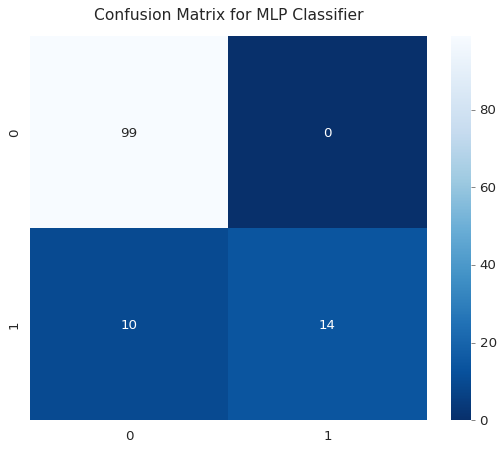

In [ ]:
# Confusion matrix for Neural Network
y_pred_MLPClassifier = MultiLayerPerceptronClassifier.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_MLPClassifier)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for MLP Classifier", fontsize=14, y=1.03);

In [ ]:
# Classification Report for Neural Network
print(metrics.classification_report(y_test, y_pred_MLPClassifier))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        99
           1       1.00      0.58      0.74        24

    accuracy                           0.92       123
   macro avg       0.95      0.79      0.84       123
weighted avg       0.93      0.92      0.91       123



In [ ]:
import pandas as pd
from tabulate import tabulate

# Models and their respective metrics
models = [
    "Logistic Regression",
    "Decision Tree ",
    "Random Forest ",
    "K Neighbors ",
    "CatBoost ",
    "Gradient Boosting ",
    "Gaussian Naive Bayes ",
    "Support Vector Machine ",
    "MultiLayer Perceptron "
]

precision = [0.89,0.93,0.92,0.85,0.91,0.93,0.90,0.92,0.91]
recall = [0.98,0.97,0.99,1.00,1.00,1.00,0.96,0.97,1.00]
f1_score = [0.93,0.95,0.95,0.92,0.95,0.97,0.93,0.95,0.95]
support = [99,99,99,99,99,99,99,99,99]
accuracy = [88.62,91.87,91.87,85.37,91.87,94.31,87.80,91.06,91.87]

# Create DataFrame with index starting from 1
df_metrics = pd.DataFrame({
    "Model": models,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1_score,
    "Support": support,
    "Accuracy": accuracy
}, index=range(1, len(models) + 1))

# Print DataFrame using tabulate
print(tabulate(df_metrics, headers='keys', tablefmt='fancy_grid'))


╒════╤════════════════════════╤═════════════╤══════════╤════════════╤═══════════╤════════════╕
│    │ Model                  │   Precision │   Recall │   F1-Score │   Support │   Accuracy │
╞════╪════════════════════════╪═════════════╪══════════╪════════════╪═══════════╪════════════╡
│  1 │ Logistic Regression    │        0.89 │     0.98 │       0.93 │        99 │      88.62 │
├────┼────────────────────────┼─────────────┼──────────┼────────────┼───────────┼────────────┤
│  2 │ Decision Tree          │        0.93 │     0.97 │       0.95 │        99 │      91.87 │
├────┼────────────────────────┼─────────────┼──────────┼────────────┼───────────┼────────────┤
│  3 │ Random Forest          │        0.92 │     0.99 │       0.95 │        99 │      91.87 │
├────┼────────────────────────┼─────────────┼──────────┼────────────┼───────────┼────────────┤
│  4 │ K Neighbors            │        0.85 │     1    │       0.92 │        99 │      85.37 │
├────┼────────────────────────┼─────────────┼─────

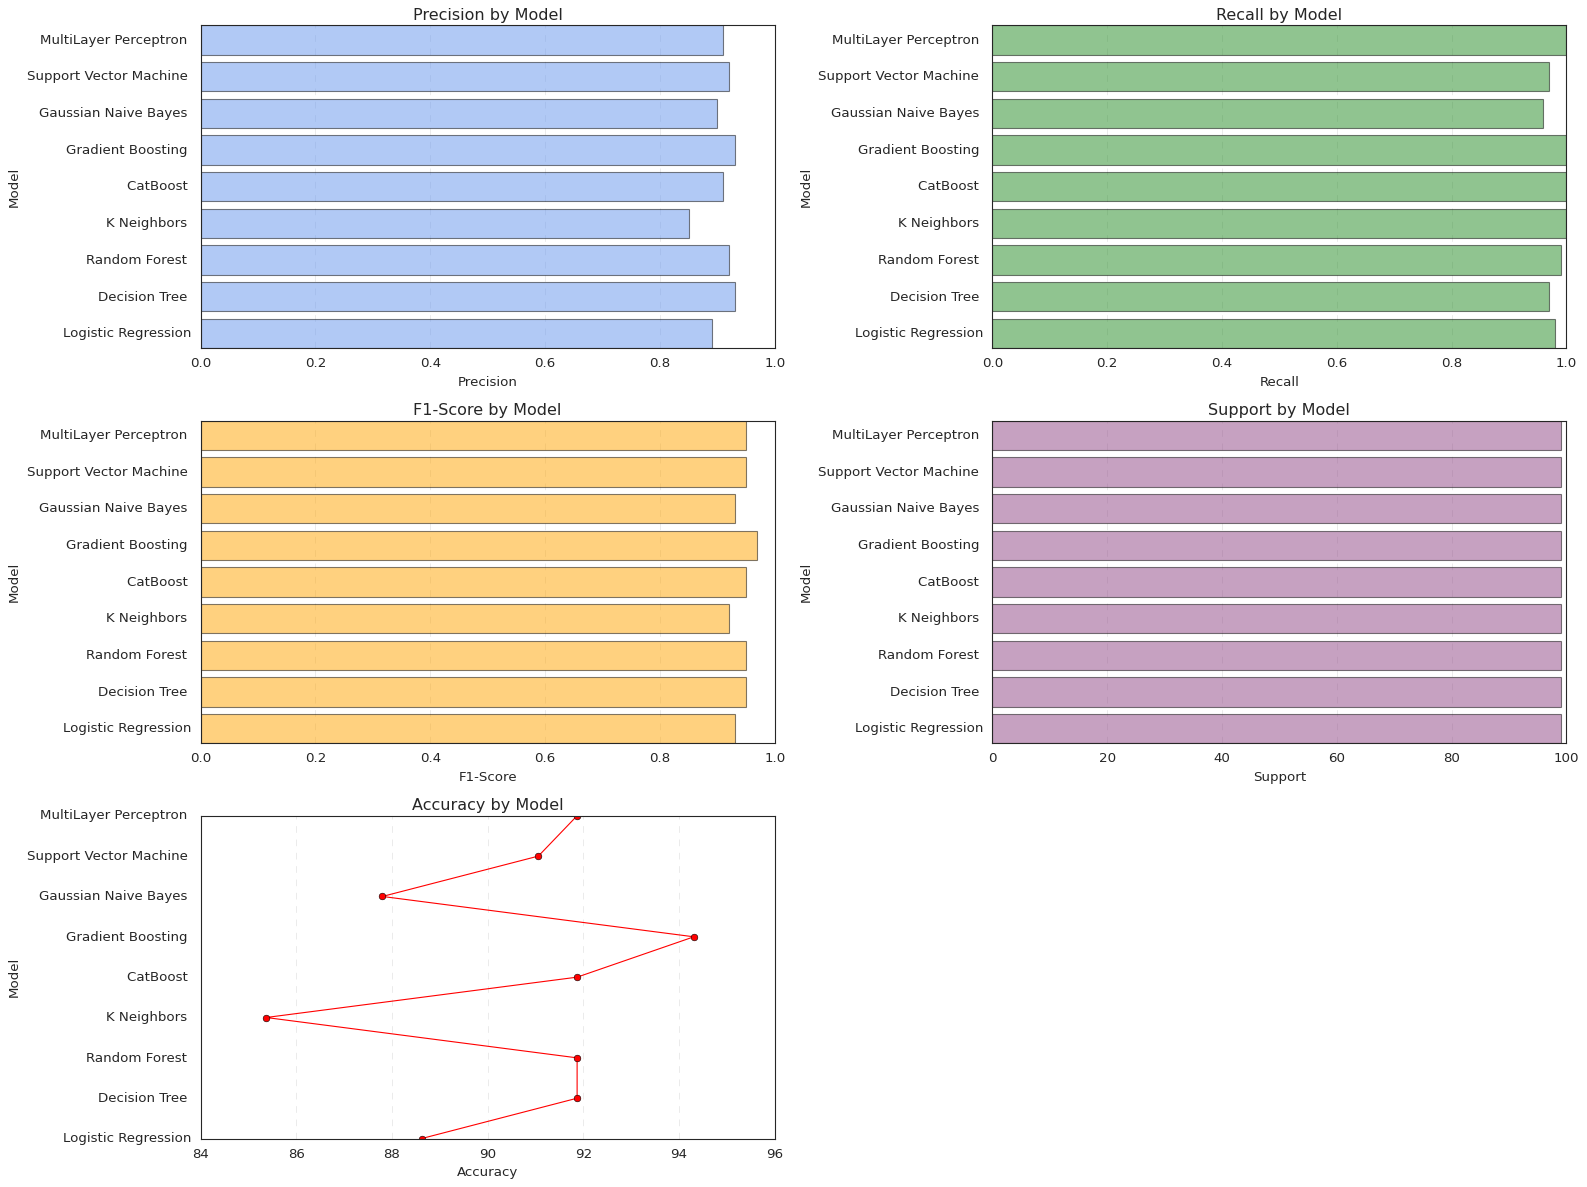

In [ ]:
import matplotlib.pyplot as plt

# Set figure size and create subplots
fig, ax = plt.subplots(3, 2, figsize=(20, 15))

# Plotting precision
ax[0, 0].barh(df_metrics['Model'], df_metrics['Precision'], color='#6495ED',edgecolor='black', alpha=0.5)
ax[0, 0].set_xlabel('Precision')
ax[0, 0].set_ylabel('Model')
ax[0, 0].set_title('Precision by Model')
ax[0, 0].grid(axis='x', linestyle='--', alpha=0.7)

# Plotting recall
ax[0, 1].barh(df_metrics['Model'], df_metrics['Recall'], color='#228B22',edgecolor='black', alpha=0.5)
ax[0, 1].set_xlabel('Recall')
ax[0, 1].set_ylabel('Model')
ax[0, 1].set_title('Recall by Model')
ax[0, 1].grid(axis='x', linestyle='--', alpha=0.7)

# Plotting F1-score
ax[1, 0].barh(df_metrics['Model'], df_metrics['F1-Score'], color='#FFA500',edgecolor='black', alpha=0.5)
ax[1, 0].set_xlabel('F1-Score')
ax[1, 0].set_ylabel('Model')
ax[1, 0].set_title('F1-Score by Model')
ax[1, 0].grid(axis='x', linestyle='--', alpha=0.7)

# Plotting support
ax[1, 1].barh(df_metrics['Model'], df_metrics['Support'], color='#8E4585',edgecolor='black', alpha=0.5)
ax[1, 1].set_xlabel('Support')
ax[1, 1].set_ylabel('Model')
ax[1, 1].set_title('Support by Model')
ax[1, 1].grid(axis='x', linestyle='--', alpha=0.7)

# Plotting accuracy
ax[2, 0].plot(df_metrics['Accuracy'], df_metrics['Model'], color='#FF0000', marker='o', linestyle='-')
ax[2, 0].set_xlabel('Accuracy')
ax[2, 0].set_ylabel('Model')
ax[2, 0].set_title('Accuracy by Model')
ax[2, 0].grid(axis='x', linestyle='--', alpha=0.7)

# Remove empty subplot
fig.delaxes(ax[2, 1])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

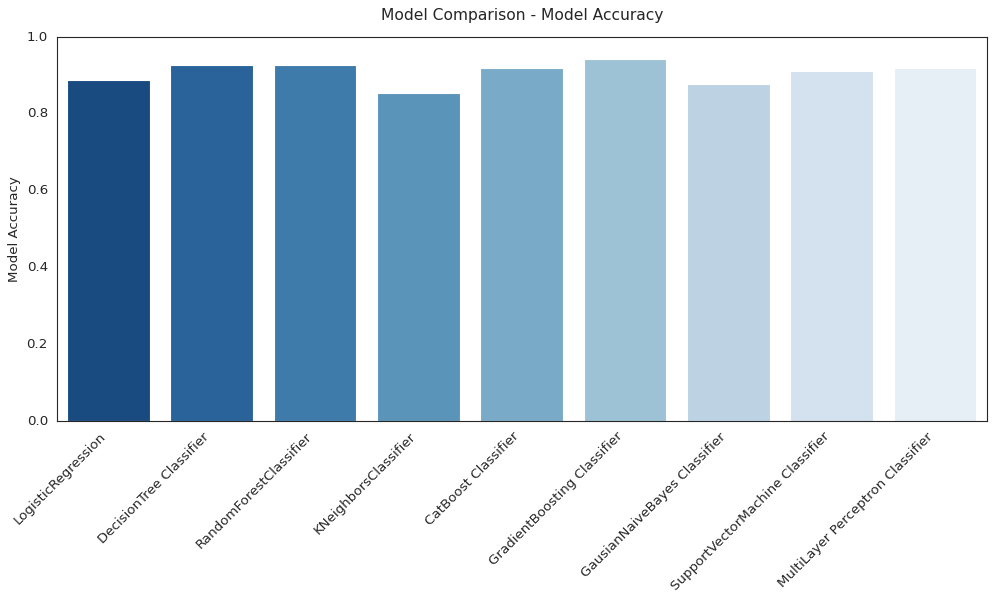

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use("seaborn")

x = ["LogisticRegression",
     "DecisionTree Classifier",
     "RandomForestClassifier",
     "KNeighborsClassifier",
     "CatBoost Classifier",
     "GradientBoosting Classifier",
     "GausianNaiveBayes Classifier",
     "SupportVectorMachine Classifier",
     "MultiLayer Perceptron Classifier"]

y = [LogisticRegressionScore,
     DecisionTreeClassifierScore,
     RandomForestClassifierScore,
     KNeighborsClassifierScore,
     CatBoostClassifierScore,
     GradientBoostingClassifierScore,
     nb_score,
     SVMScore,
     MLPscore]

colors = sns.color_palette("viridis", len(x))

fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x=x,y=y, palette="Blues_r");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=45,ha='right')
plt.title("Model Comparison - Model Accuracy", fontsize=14, y=1.03);

* `Gradient Boosting Classifier` and `Random Forest Regression` perform best on the test set.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import numpy as np
from tabulate import tabulate

classifiers = [("Logistic Regression", lr), ("Decision Tree", tree), ("Random Forest", rfc), ("K Neighbors", knn),
               ("CatBoost", cat), ("Gradient Boosting", gb), ("Gaussian Naive Bayes", nb),
               ("Support Vector Machine", SupportVectorClassifier), ("MultiLayer Perceptron", MultiLayerPerceptronClassifier)]

metrics_results = {}

for name, clf in classifiers:
    y_pred_score = clf.decision_function(X_test) if name == "Support Vector Machine" else clf.predict_proba(X_test)[:, 1]
    y_pred_binary = (y_pred_score > 0.5).astype(int)
    mae = mean_absolute_error(y_test, y_pred_binary)
    mse = mean_squared_error(y_test, y_pred_binary)
    rmse = np.sqrt(mse)
    male = mean_squared_log_error(y_test, y_pred_binary)
    non_zero_indices = np.where(y_test != 0)[0]
    y_test_filtered = y_test.iloc[non_zero_indices]
    y_pred_binary_filtered = y_pred_binary[non_zero_indices]
    absolute_percentage_errors = np.abs((y_test_filtered - y_pred_binary_filtered) / y_test_filtered)
    mape = np.mean(absolute_percentage_errors) * 100 if len(absolute_percentage_errors) > 0 else np.nan
    metrics_results[name] = {"MAE": mae, "MAPE": mape, "MSE": mse, "RMSE": rmse, "MALE": male}

table_data = [["Classifier", "MAE", "MAPE (%)", "MSE", "RMSE", "MALE"]]

for name, metrics in metrics_results.items():
    table_data.append([name, f"{metrics['MAE']:.4f}", f"{metrics['MAPE']:.2f}%",
                       f"{metrics['MSE']:.4f}", f"{metrics['RMSE']:.4f}", f"{metrics['MALE']:.4f}"])

print(tabulate(table_data, headers="firstrow", tablefmt="fancy_grid"))


╒════════════════════════╤════════╤════════════╤════════╤════════╤════════╕
│ Classifier             │    MAE │ MAPE (%)   │    MSE │   RMSE │   MALE │
╞════════════════════════╪════════╪════════════╪════════╪════════╪════════╡
│ Logistic Regression    │ 0.1138 │ 50.00%     │ 0.1138 │ 0.3374 │ 0.0547 │
├────────────────────────┼────────┼────────────┼────────┼────────┼────────┤
│ Decision Tree          │ 0.0732 │ 29.17%     │ 0.0732 │ 0.2705 │ 0.0352 │
├────────────────────────┼────────┼────────────┼────────┼────────┼────────┤
│ Random Forest          │ 0.0732 │ 33.33%     │ 0.0732 │ 0.2705 │ 0.0352 │
├────────────────────────┼────────┼────────────┼────────┼────────┼────────┤
│ K Neighbors            │ 0.1463 │ 75.00%     │ 0.1463 │ 0.3825 │ 0.0703 │
├────────────────────────┼────────┼────────────┼────────┼────────┼────────┤
│ CatBoost               │ 0.0813 │ 41.67%     │ 0.0813 │ 0.2851 │ 0.0391 │
├────────────────────────┼────────┼────────────┼────────┼────────┼────────┤
│ Gradient B

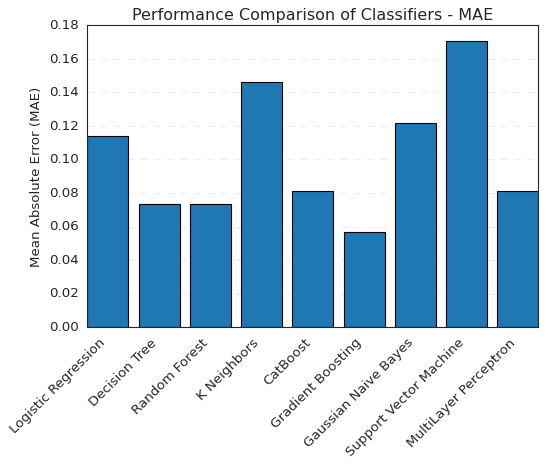

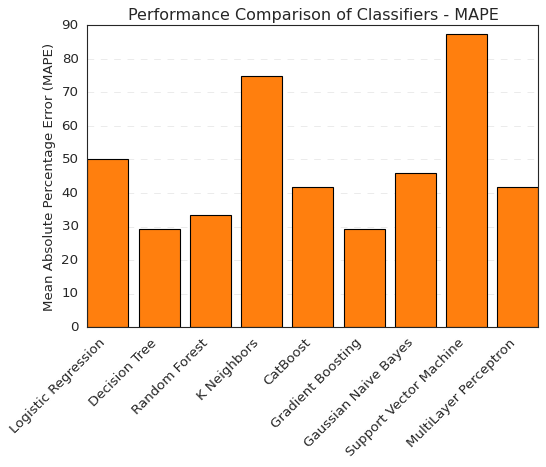

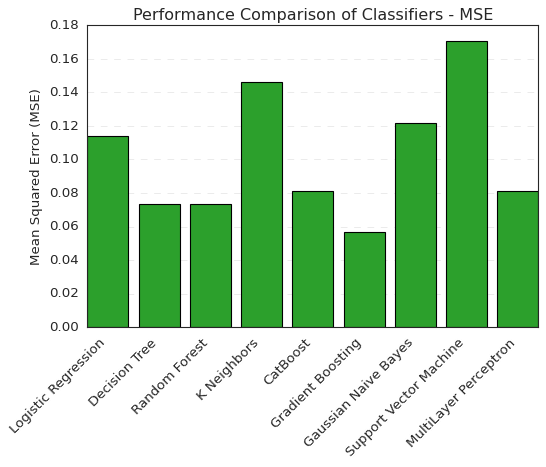

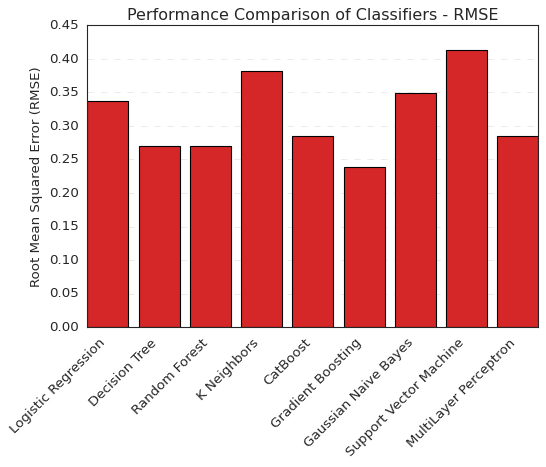

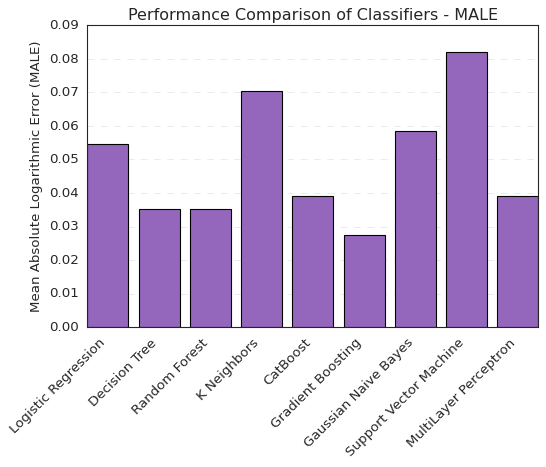

In [ ]:
import matplotlib.pyplot as plt

def plot_metric(classifiers_names, metric_values, title, ylabel, color, filename):
    plt.figure(figsize=(7, 6))
    plt.bar(classifiers_names, metric_values, color=color, edgecolor='black')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(filename)  # Saving the plot as an image
    plt.show()

# Define color schemes
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
titles = ['Performance Comparison of Classifiers - MAE',
          'Performance Comparison of Classifiers - MAPE',
          'Performance Comparison of Classifiers - MSE',
          'Performance Comparison of Classifiers - RMSE',
          'Performance Comparison of Classifiers - MALE']
ylabls = ['Mean Absolute Error (MAE)',
          'Mean Absolute Percentage Error (MAPE)',
          'Mean Squared Error (MSE)',
          'Root Mean Squared Error (RMSE)',
          'Mean Absolute Logarithmic Error (MALE)']
filenames = ['mae_plot.png', 'mape_plot.png', 'mse_plot.png', 'rmse_plot.png', 'male_plot.png']

for i, (title, ylabel, filename) in enumerate(zip(titles, ylabls, filenames)):
    metric_values = [metrics_results[classifier][" ".join(title.split(' - ')[-1].split()[-2:])] for classifier, _ in classifiers]
    plot_metric([classifier for classifier, _ in classifiers], metric_values, title, ylabel, colors[i], filename)


## Hyperparameter Tuning on Random Forest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search_rfc = GridSearchCV(estimator = rfc,
                           param_grid = param_grid,
                           cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [ ]:
grid_search_rfc.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 200}

In [ ]:
grid_search_rfc.best_score_

0.9735772357723578

In [ ]:
grid_search_rfc_predict = grid_search_rfc.predict(X_test)

In [ ]:
print('Improvement in Random Forest Classifier after GridSearchCV: {:0.2f}%.'.format(100 * (grid_search_rfc.best_score_ - RandomForestClassifierScore) / RandomForestClassifierScore))

Improvement in Random Forest Classifier after GridSearchCV: 5.04%.


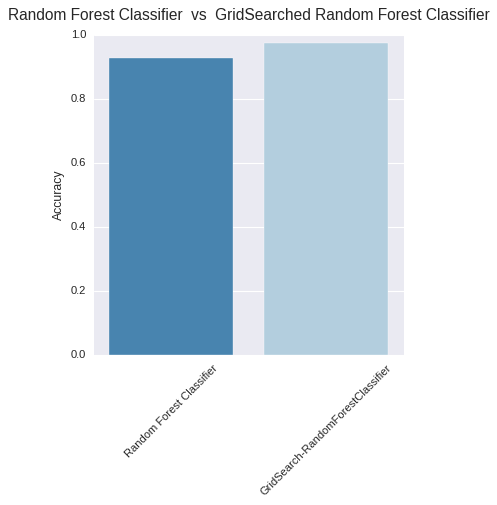

In [ ]:
# Comparing the results after the improvement in Random Forest Classifier

plt.style.use("seaborn")

x = ["Random Forest Classifier",
     "GridSearch-RandomForestClassifier"]

y = [RandomForestClassifierScore,
     grid_search_rfc.best_score_]

fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=x,y=y, palette="Blues_r");
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.title("Random Forest Classifier  vs  GridSearched Random Forest Classifier", fontsize=14, y=1.03);

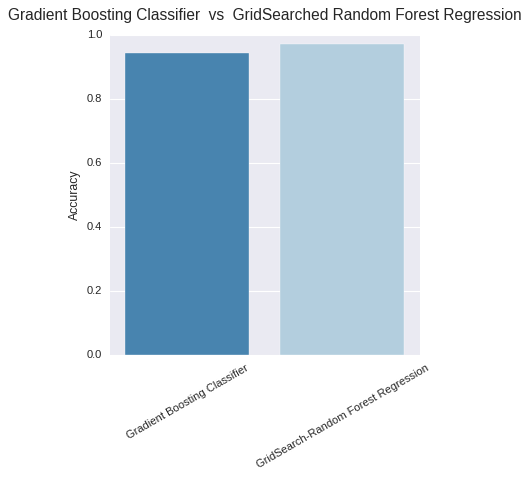

In [ ]:
# Comparing the GridSearch-Random Forest Regression and Gradient Boosting Classifier

plt.style.use("seaborn")

x = ["Gradient Boosting Classifier",
     "GridSearch-Random Forest Regression"]

y = [GradientBoostingClassifierScore,
     grid_search_rfc.best_score_]

fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=x,y=y, palette="Blues_r");
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.title("Gradient Boosting Classifier  vs  GridSearched Random Forest Regression", fontsize=14, y=1.03);

### After Hyperparameter tuning, the Random Forest Regression model performs better than the Gradient Boosting Classifier which was not the case before!

In [ ]:
# Classification Report of GridSearch-RandomForestRegression

print(classification_report(y_test, grid_search_rfc_predict))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        99
           1       0.93      0.58      0.72        24

    accuracy                           0.91       123
   macro avg       0.92      0.79      0.83       123
weighted avg       0.91      0.91      0.90       123

